In [2]:
import numpy as np
import os
import tensorflow as tf
from matplotlib import pyplot as plt

from interlacer import data_generator, models, utils
from scripts import load_model_utils
from visualizations import plotting_utils

In [3]:
test_image = np.expand_dims(np.load('sample_test_data/sample_slice.npz')['vol_data'],0)

In [4]:
def plot(k_in, k_out, k_recon):
    fig, axs = plt.subplots(1,3, figsize=(15,5))
    plotting_utils.plot_img_from_k(k_in,0,ax=axs[0])
    axs[0].set_title('Input')
    
    plotting_utils.plot_img_from_k(k_out,0,ax=axs[1])
    axs[1].set_title('Ground Truth')
    
    plotting_utils.plot_img_from_k(k_recon,0,ax=axs[2])
    axs[2].set_title('Recon')

## Sample Undersampled Recon

In [4]:
# Get test input
us_dg = data_generator.generate_undersampled_data(
        test_image,
        'FREQ',
        'FREQ',
        0.75,
        True,
        batch_size=1)

(k_in, mask), k_out = next(us_dg)

In [5]:
# Load model and predict
model_dir = 'ADNI_undersampledrecon'

config_file = [i for i in os.listdir(model_dir) if i[-4:]=='.ini'][0]
config, model = load_model_utils.load_model(os.path.join(model_dir,config_file))

model.load_weights(os.path.join(model_dir,'cp-final.ckpt'))

k_recon = model.predict((k_in,mask))

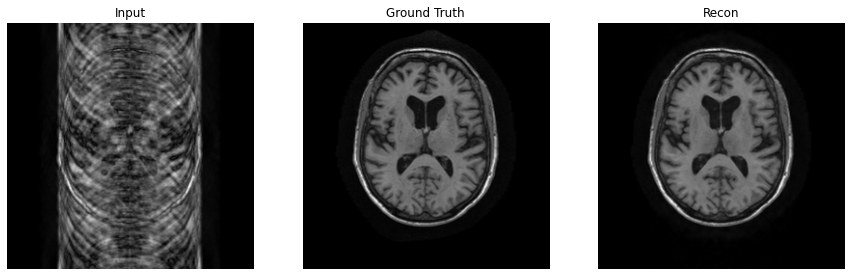

In [6]:
plot(k_in, k_out, k_recon)

## Sample Motion Correction

In [5]:
# Get test input
mo_dg = data_generator.generate_motion_data(
        test_image,
        'FREQ',
        'FREQ',
        0.03,
        0.03,
        0.03,
        0.03,
        batch_size=1)

k_in, k_out = next(mo_dg)

In [6]:
# Load model and predict
model_dir = 'ADNI_motioncorrection'

config_file = [i for i in os.listdir(model_dir) if i[-4:]=='.ini'][0]
config, model = load_model_utils.load_model(os.path.join(model_dir,config_file))

model.load_weights(os.path.join(model_dir,'cp-final.ckpt'))

k_recon = model.predict(k_in)

1/1 [==============================] - 3s 3s/step


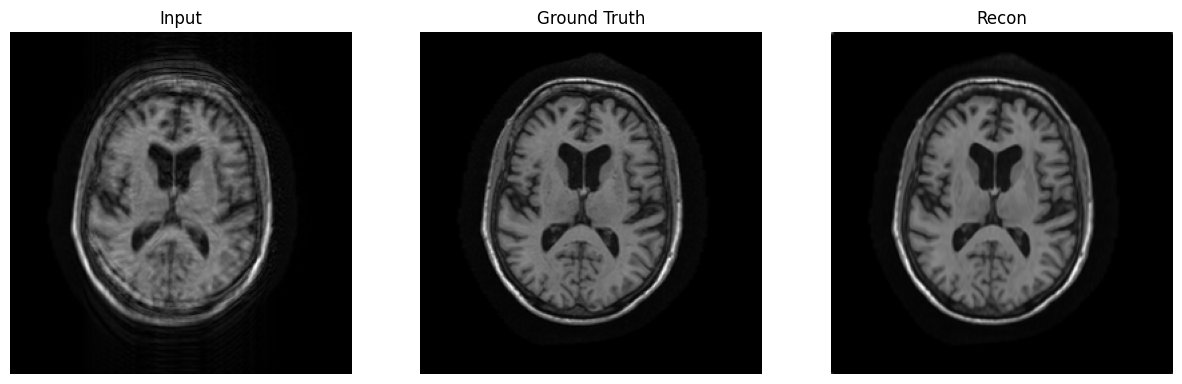

In [7]:
plot(k_in, k_out, k_recon)

## Sample Denoising

In [8]:
# Get test input
no_dg = data_generator.generate_noisy_data(
        test_image,
        'FREQ',
        'FREQ',
        10000.0,
        batch_size=1)

k_in, k_out = next(no_dg)

In [9]:
# Load model and predict
model_dir = 'ADNI_denoising'

config_file = [i for i in os.listdir(model_dir) if i[-4:]=='.ini'][0]
config, model = load_model_utils.load_model(os.path.join(model_dir,config_file))

model.load_weights(os.path.join(model_dir,'cp-final.ckpt'))

k_recon = model.predict(k_in)

1/1 [==============================] - 3s 3s/step


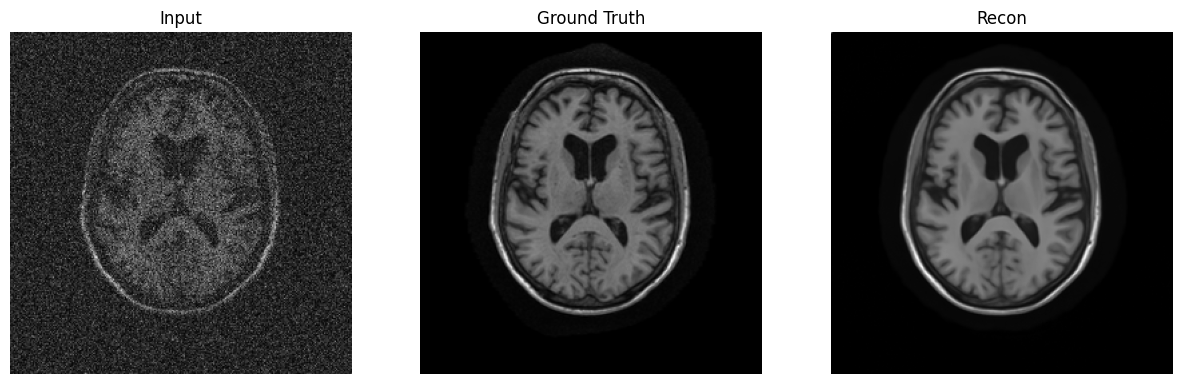

In [10]:
plot(k_in, k_out, k_recon)